In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

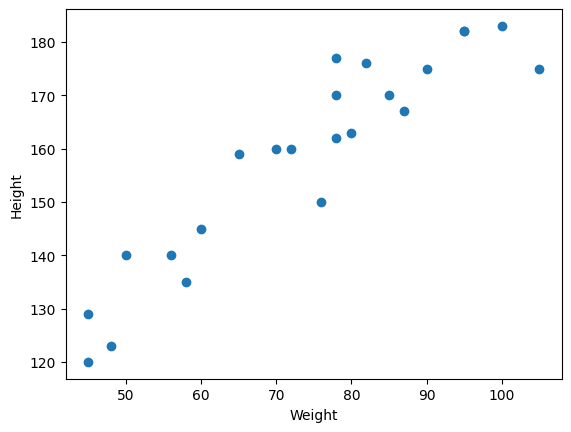

In [4]:
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
# Divide dataset into independent and dependent features
x = df[["Weight"]]  # double brackets return a DataFrame (2D)
y = df["Height"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

In [7]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [8]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [9]:
X_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


### StandardScaler (Short Notes)

- **Purpose:** Rescales features to have zero mean (`μ=0`) and unit standard deviation (`σ=1`). Formula: `z = (x - μ) / σ`.
- **`fit(X_train)`:** Learns the mean (`μ`) and standard deviation (`σ`) from the **training data** only.
- **`transform(X)`:** Applies the learned scaling (`μ`, `σ`) to the data `X`. Used on **both train and test data**.
- **`fit_transform(X_train)`:** Combines `fit` and `transform` in one step. Use **only on training data**.

**Usage:**

1.  Instantiate: `scaler = StandardScaler()`
2.  Fit & Transform Train Data: `X_train_scaled = scaler.fit_transform(X_train)`
3.  Transform Test Data: `X_test_scaled = scaler.transform(X_test)` (Uses `μ`, `σ` from `X_train`)

**Reason:** Prevents **data leakage**. The test set must remain unseen during fitting. Scaling must be consistent, using only parameters learned from the training data.


In [10]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

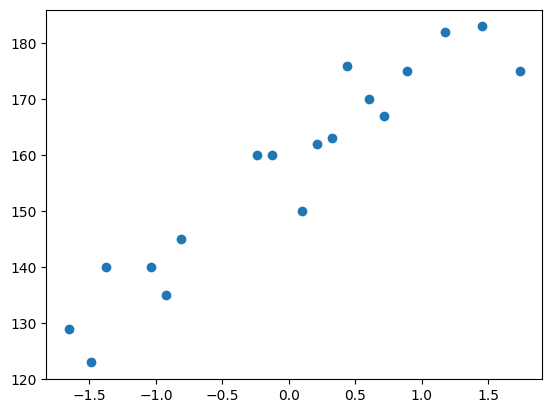

In [11]:
plt.scatter(X_train, y_train)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

In [14]:
regressor

LinearRegression()

In [15]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [16]:
print(X_train.shape)
print(y_train.shape)

(18, 1)
(18,)


In [17]:
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
# Coefficient and Intercepts
print("Coefficient : ", regressor.coef_)
print("Intercept : ", regressor.intercept_)

Coefficient :  [17.03440872]
Intercept :  157.5


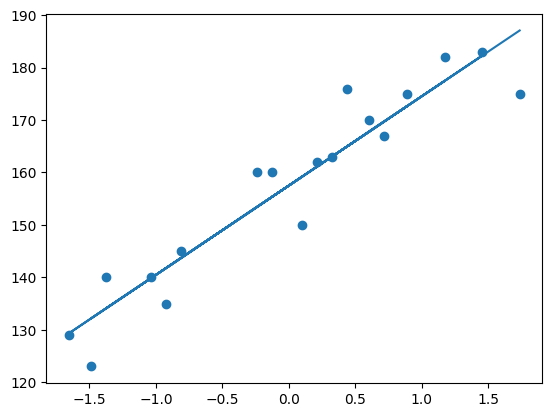

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train))

### Prediction of train data

1. predicted height output = intercept + coef\_(Weights)
2. y_pred_train = 65.4364 + 1.26(X_train)

### Prediction of test data

1. predicted height output= intercept + coef\_(Weights)
2. y_pred_test = 65.4364 + 1.26(X_test)


In [20]:
y_pred_test = regressor.predict(X_test)

In [21]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

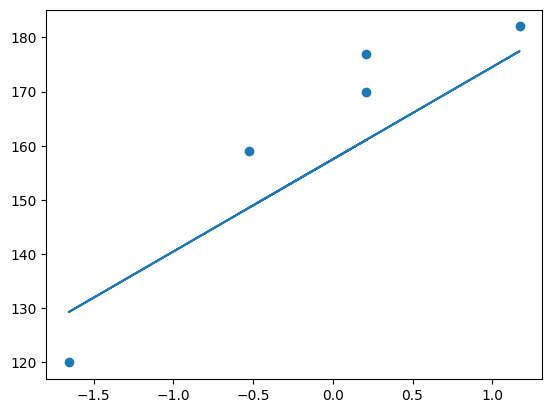

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test))

In [23]:
# Performance metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square

#### Formula

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination
SSR = sum of squares of residuals
SST = total sum of squares


In [25]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)
print(score)

0.776986986042344


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables


In [26]:
# Display adjusted R-squared
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.7026493147231252

In [27]:
regressor.predict(scaler.transform([[75]]))

c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.19553315])

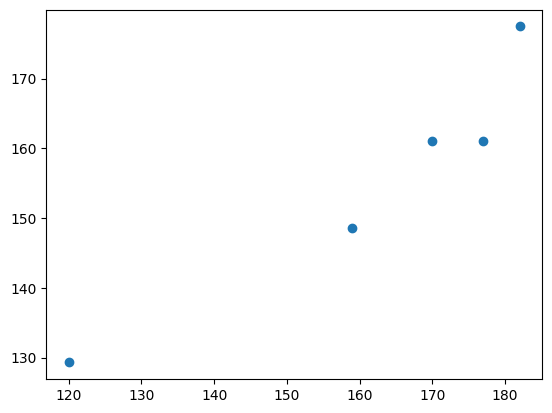

In [28]:
# Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)

In [29]:
## Residuals
residuals = y_test - y_pred_test

residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

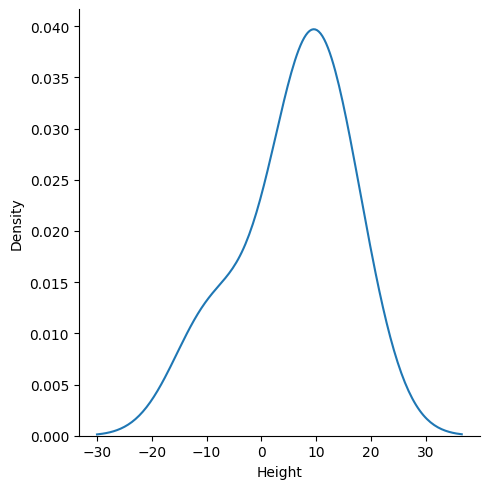

In [30]:
# Plot residuals
import seaborn as sns

sns.displot(residuals, kind="kde")

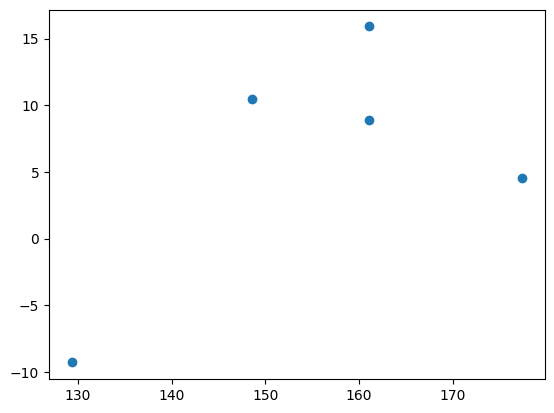

In [31]:
# Scatter plot with respect to prediction and residuals
# Uniform distribution
plt.scatter(y_pred_test, residuals)

## Using OLS


In [32]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [33]:
import statsmodels.api as sm

In [34]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

In [35]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Mon, 07 Apr 2025   Prob (F-statistic):                       0.661
Time:                        18:13:38   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [36]:
regressor.coef_

array([17.03440872])